# 인공지능기초 3주차 실습

대표적인 **파이썬 데이터분석 라이브러리**인 판다스([Pandas](https://pandas.pydata.org/))를 사용한다.<br>
데이터분석에 자주 사용되는 만큼 코랩(Colab) 환경에서는 기본적으로 설치가 되어 있다.

In [1]:
import pandas as pd

실습에 사용되는 데이터파일인 [housing.csv](https://github.com/ageron/data/blob/main/housing/housing.csv)은 1990년대 조사된 **캘리포니아 주택 가격** 데이터셋이다.<br>
<code>Pandas</code>에서 <code>csv</code>파일(Comman-Separated Values)을 읽는 <code>read_csv()</code>파일은 온라인 상의 주소(url)을 바로 읽을 수 있다.

In [2]:
data_path = "https://raw.githubusercontent.com/ageron/data/refs/heads/main/housing/housing.csv"
df = pd.read_csv(data_path)

<code>Pandas</code>의 기본 자료구조는 <code>DataFrame</code>이다.

In [3]:
type(df)

pandas.core.frame.DataFrame

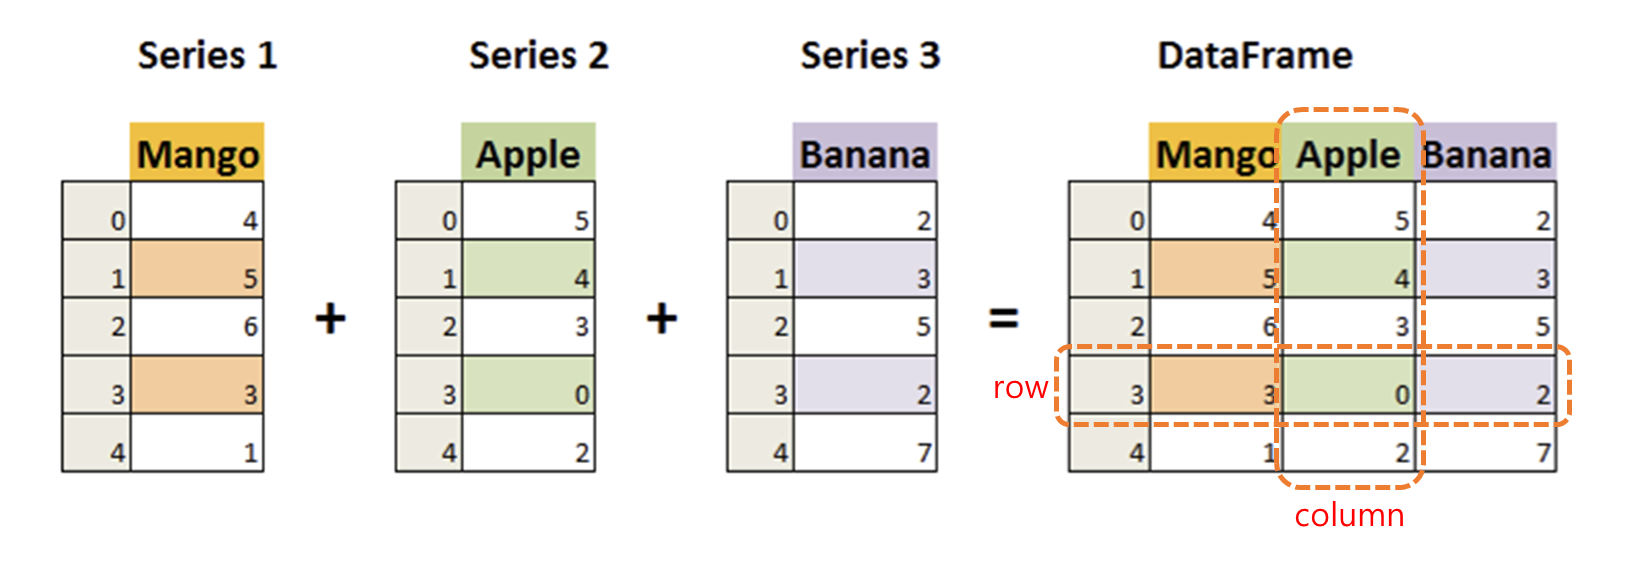

순차적으로 데이터를 저장하는 1차원 배열인 <code>Series</code>가 결합된 형태의 <code>DataFrame</code>는 **행(row)**과 **열(Column)**로 이뤄진 테이블 형태의 2차원 데이터 구조다.

## 단계 1. 데이터 구조 훑어보기

### 1-1. 데이터프레임의 처음 몇 개의 행을 살펴보는 <code>head()</code>

<code>head()</code> 함수는 데이터프레임(DataFrame)의 처음 몇 개를 반환하는 함수다.<br>
<code>head()</code> 안에 숫자를 적어주면 그 수만큼의 행을 출력할 수 있고, 기본값은 5개다.

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


처음 3개의 항만 확인하고 싶을 때는 <code>n=3</code>를 입력할 수 있다.

In [5]:
df.head(n=3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


비슷한 방식으로 DataFrame객체의 끝에 있는 데이터 몇개를 확인할 때에는 <code>tail()</code>을 사용할 수 있다.

In [6]:
df.tail(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


데이터프레임의 개수는 <code>len(df)</code>로 확인할 수 있는데, 이로부터 위의 <code>tail()</code>이 끝에 있는 데이터들을 보여줌을 확인할 수 있다.

In [7]:
len(df)

20640

### 1-2. 데이터프레임에 대한 간단한 정보를 확인하는 <code>info()</code>

데이터에 대한 간략한 설명과 **전체 행 수**, **각 특성의 데이터 타입**, **널(null)이 아닌 값의 개수** 등을 확인할 때는 데이터프레임의 <code>info()</code>를 사용할 수 있다.

In [ ]:
df.info()

위의 정보 중에서 <code>total_bedrooms</code> 컬럼의 <code>Not-Null</code>(Null 값이 아닌) 샘플의 개수는 20433개 임을 알 수 있다.<br>
아래와 같은 방식으로 Null값인 샘플의 개수도 계산할 수 있다.

In [ ]:
df["total_bedrooms"].isnull().sum().item()

<code>isnull()</code> 대신에 <code>isna()</code>도 동일한 결과를 반환한다.

In [ ]:
df["total_bedrooms"].isna().sum().item()

### 1-3. 컬럼에서 카테고리별로 개수를 살펴보는 <code>value_counts()</code>

수치형 데이터인 다른 특성(feature)과 달리 <code>ocean_proximity</code>는 **문자열**이다(데이터프레임에서는 <code>object</code> 타입으로 나타난다).<br>
이 때, 모든 문자열이 임의의 값이지는 않고, 특정 범주(category) 중의 하나일 것이다.<br>
<code>ocean_proximity</code>는 정성 데이터(qualitative data) 중에서 범주형 데이터다.

데이터프레임에서 특성명(또는 새로로 배열되었다는 의미에서 컬럼명)을 입력하면, 특정한 컬럼만 선택할 수 있다.<br>
이렇게 선택된 컬럼에서 <code>value_counts()</code>함수를 사용하면, 중복되지 않은 값이 몇 개 있는지 확인할 수 있다.

In [ ]:
df["ocean_proximity"].value_counts()

예상할 수 있듯이 범주형 데이터가 아닌 연속형 수치 데이터를 갖는 컬럼에서 <code>value_counts()</code>를 쓰면 의미있는 정보를 얻기는 힘들다.

In [ ]:
df["longitude"].value_counts()

개수 대신에 단순히 중복되지 않은 항목의 종류만 알고 싶을 때에는 <code>unique()</code>를 사용할 수 있다

In [ ]:
df["ocean_proximity"].unique()

### 1-4. 수치형 특성의 요약정보를 보여주는 <code>describe()</code>

- count : 행의 개수
- mean : 수치형 특성의 평균값
- std : 수치형 특성의 표준편차
- min, max : 최소값과 최대값
- 25%, 50%, 75% : 제 1 사분위수, 중간값(median), 제 3 사분위수

In [ ]:
df.describe()

### 1-5. 히스토그램을 그려주는 <code>hist()</code>

히스토그램(histogram)은
- 연속적인 데이터를 일정한 구간으로 나누고,
- 각 구간에 속하는 데이터의 개수를 막대의 높이로 표현한다.

히스토그램을 통하여, 연속형 데이터의 분포를 한 눈에 파악할 수 있다.

In [ ]:
df.hist()

위에서 보는 것처럼 설정값을 입력하지 않으면, 보기에 불편할 수 있다.
- bins : 히스토그램에 나타낼 구간의 수
- figsize : 히스토그램이 포함된 전체 그래프 이미지의 크기

이를 고려하여 <code>bins=50</code>, <code>figsize=(20, 15)</code>를 입력하여 히스토그램을 새로 그려본다.

In [ ]:
df.hist(bins=50, figsize=(20, 15))

위의 히스토그램으로 판단할 수 있는 사항은 다음과 같다.

1. 중간 소득(median_income)의 X축 눈금을 보면, 단순히 달러($)단위가 아닐 수 있음을 알 수 있다.<br>
실제로는 상한값이 15, 하한값이 0.5가 되도록 스케일이 조정된 값으로 생각할 수 있다.

2. housing_median_age와 median_house_value의 히스토그램에서 가장 오른쪽 구간의 값이 치솟는 것을 알 수 있다.<br>
이는 해당 속성(=컬럼)의 최댓값을 한정해서 나타나는 현상으로, 그대로 학습하게 되면, 최댓값 이상으로는 값을 예상할 수 없도록 학습될 것이다.
    
    a. 따라서 최댓값을 없애고 정확한 레이블을 복원한 다음에 훈련을 시키거나
    
    b. 훈련데이터셋에서 최댓값 이상의 값을 제거한다.

3. 각 속성마다 범위와 히스토그램의 모양이 큰 차이를 보인다. 즉, 특성들의 스케일이 많이 다르거나 데이터의 분포가 편향된 상태로 생각할 수 있다.

## 단계 2. 테스트셋 만들기(=데이터셋의 분할)

과대적합(overfitting)을 막고, 올바른 일반화 오차(generalization error)를 얻으려면, 전체 데이터셋을 분할하는 것이 필요하다.<br>
실제로는 **훈련데이터셋**과 **테스트 데이터셋** 이외에 후보모델 중 최고 성능 모델을 선택하기 위한 **검증 데이터셋**이 있으면 좋지만, 여기에서는 단순히 훈련-테스트 셋으로만 나누도록 한다.

### 단계 2-1. 무작위 샘플링으로 데이터셋 분할

scikit-learn의 <code>train_test_split</code>을 사용하면, 원하는 비율만큼 테스트셋을 분할할 수 있다.<br>
- test_size : 테스트셋 분할 비율
- random_state : 초기 난수값 - 고정함으로써 계속 동일하게 분할 가능

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state=42)

In [ ]:
print(f"데이터셋의 총 레코드수: {len(df)}")
print(f"훈련셋의 레코드 수 : {len(train_set)}, 훈련셋의 비율 : {len(train_set)/len(df):.4f}")
print(f"테스트셋의 레코드 수: {len(test_set)}, 테스트셋의 비율: {len(test_set)/len(df):.4f}")

### 단계 2-2. 계층적 샘플링을 통한 데이터셋 분할

가장 간단한 방식의 데이터셋 분할인 <code>train_test_split</code>은 **무작위 샘플링** 이기 때문에, 때때로 **특정 속성**에서 훈련 데이터와 테스트 데이터의 분포 비율이 다르게 나타나는 **샘플링 편향** 또는 **샘플링 잡음**이 생길 수 있다.

중위 소득을 의미하는 <code>median_income</code> 컬럼의 분포를 알아보기 위하여 히스토그램을 그려본다.

In [ ]:
df["median_income"].hist(bins = 5)

중위 소득을 연속된 값 대신에 다섯개의 구간으로 나누고, 각각에 독립적인 레이블을 부여한다.<br>
<code>pandas.cut()</code>함수를 이용하여, 히스토그램을 그리듯이 **연속형 데이터**를 구간(bin)으로 나눠 **범주형 데이터**로 변환할 수 있다.

In [ ]:
import numpy as np
df["income_category"] = pd.cut(df["median_income"],
                               bins=[0.0, 1.5, 3.0, 4.5, 6., np.inf ],
                               labels = [1, 2, 3, 4, 5])

분할된 결과는 다음과 같다.

In [ ]:
df["income_category"].value_counts()

In [ ]:
df["income_category"].hist()

이제 <code>income_category</code>로 데이터셋을 분할했을 때, 훈련셋과 테스트셋의 특성별 비율을 비교해보려고 한다.<br>
원래 데이터프레임이 변경되지 않도록, 되도록이면 새로운 **데이터프레임으로 복사**해서 실행한다.

In [ ]:
df_new = df.copy()

우선, 이전과 동일하게 <code>train_test_split</code>으로 분할한다.

In [ ]:
new_train_set, new_test_set = train_test_split(df_new, test_size = 0.2, random_state=42)

히스토그램을 각각 그려본다. 하지만 그 비율이 어떠한지 알기 쉽지 않다.

In [ ]:
new_train_set["income_category"].hist()

In [ ]:
new_test_set["income_category"].hist()

<code>income_category</code>의 비율이 **전체 데이터셋, 훈련셋, 테스트셋**에서 어떻게 변하는지 계산해본다.<br>
카테고리별 비율이 다름을 확인할 수 있다.

In [ ]:
df_new["income_category"].value_counts() / len(df_new)

In [ ]:
new_train_set["income_category"].value_counts() / len(new_train_set)

In [ ]:
new_test_set["income_category"].value_counts() / len(new_test_set)

이제 분할하려는 기준 카테고리의 비율이 유지되면서 데이터셋을 분할하는 **계층적 샘플링**을 진행해본다.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [ ]:
for train_idx, test_idx in sss.split(df_new, df_new["income_category"]):
    new2_train_set = df_new.loc[train_idx]
    new2_test_set = df_new.loc[test_idx]

이번에도 동일하게 <code>income_category</code>의 비율이 **전체 데이터셋, 훈련셋, 테스트셋**에서 어떻게 변하는지 확인해본다.<br>
무작위 샘플링의 경우와 달리, 각 카테고리별 샘플의 비율이 거의 동일함을 알 수 있다.

In [ ]:
df_new["income_category"].value_counts() / len(df_new)

In [ ]:
new2_train_set["income_category"].value_counts() / len(new2_train_set)

In [ ]:
new2_test_set["income_category"].value_counts() / len(new2_test_set)

임의로 만든 <code>income_category</code>항목은 삭제하고, 계속 진행해본다.

In [ ]:
df.drop("income_category", axis= 1, inplace=True)

In [ ]:
new2_train_set.drop("income_category", axis=1, inplace=True)
new2_test_set.drop("income_category", axis=1, inplace=True)

## 단계 3. 데이터 시각화

데이터 분석 및 시각화가 이번 수업의 목표가 아니므로, 제공된 코드를 통해 시각화 되는 방식을 살펴보는 것으로 충분하다.

In [ ]:
df.plot(kind="scatter", x="longitude", y="latitude", grid=True)

In [ ]:
df.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)

In [ ]:
df.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=df["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, figsize=(10, 7))

## 단계 4. 상관관계 분석

데이터프레임의 <code>corr</code>함수를 사용하면, **특성 간의 관련성**을 알아볼 수 있다.<br>
이 때, 문자열 데이터는 상관관계 분석에서 제외해야하므로, <code>numeric_only=True</code> 옵션을 넣어준다.

In [ ]:
corr_df = df.corr(numeric_only=True)

In [ ]:
corr_df

상관계수(correlation coefficient)는 -1부터 1 사이의 범위를 갖고,

- 1에 가까우면 **강한 양의 상관관계**를 가지며
- -1에 가까우면 **강한 음의 상관관계**를 가진다고 말할 수 있다.

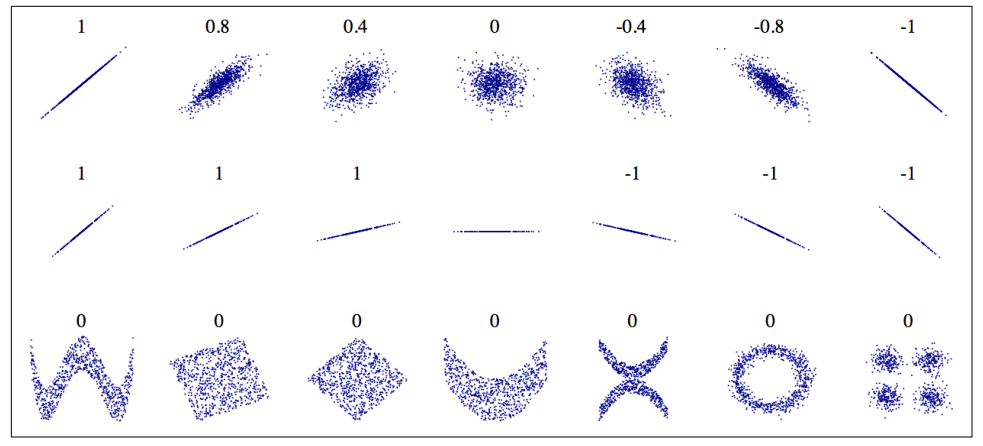

참고) 상관계수는 **선형적인 상관관계만 측정**할 수 있다는 한계를 이해한다.

여기에서 타겟변수로 예측하려하는 **median_house_value**와 다른 특성관의 상관관계를 확인해본다.

In [ ]:
corr_df["median_house_value"]

<code>sort_values()</code> 함수를 이용해서, 상관계수 값 크기대로 정렬해본다.

In [ ]:
corr_df["median_house_value"].sort_values(ascending=False)

상관계수를 숫자로만 볼 때에는 잘 파악될 수 없으므로, <code>scatter_matrix()</code>함수를 이용하여, 산점도(scatter plot)를 그려본다.

(당연히 자기 자신을 제외한 뒤) 상관계수가 가장 큰 속성인 median_income과의 산점도를 그려본다.

In [ ]:
df.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, grid=True)

매우 강한 양의 상관관계가 있음을 확인해볼 수 있으며, 앞서 살펴본 가격 제한값이 수평선 형태로 표현됨을 볼 수 있다.

## 단계 5. 새로운 특성 조합해보기

In [ ]:
df["rooms_per_house"] = df["total_rooms"] / df["households"]
df["bedrooms_ratio"] = df["total_bedrooms"] / df["total_rooms"]
df["people_per_house"] = df["population"] / df["households"]

In [ ]:
corr_df = df.corr(numeric_only=True)

In [ ]:
corr_df["median_house_value"].sort_values(ascending=False)

새로만든 특성들은 혼란을 피하기 위하여 삭제해준다.

In [ ]:
df.drop("rooms_per_house", axis= 1, inplace=True)
df.drop("bedrooms_ratio", axis= 1, inplace=True)
df.drop("people_per_house", axis= 1, inplace=True)

## 단계 6. 머신러닝 알고리즘 적용을 위한 데이터 전처리

In [ ]:
train_data = new2_train_set.drop("median_house_value", axis=1)
train_label = new2_train_set["median_house_value"].copy()

In [ ]:
train_data

In [ ]:
train_label

### 단계 6-1. 데이터 정제

In [ ]:
train_data.info()

In [ ]:
train_data["total_bedrooms"].isnull().sum()

**정제되는 방식의 결과 비교**를 위하여, 훈련 데이터(train_data)에서 "total_bedrooms"가 빈값인 행들을 추출한다.

In [ ]:
null_rows_idx = train_data.isnull().any(axis=1)
train_data.loc[null_rows_idx].head()

첫번째 가능한 전처리 방식은 결측치가 있는 데이터 행을 제거하는 것이다.

In [ ]:
df_opt1 = train_data.copy()

In [ ]:
df_opt1 = df_opt1.dropna(subset=["total_bedrooms"])

In [ ]:
df_opt1.loc[null_rows_idx].head()

두번째 가능한 전처리 방식은 결측치가 있는 컬럼을 제거하는 것이다.

In [ ]:
df_opt2 = train_data.copy()

In [ ]:
df_opt2 = df_opt2.drop("total_bedrooms", axis=1)

In [ ]:
df_opt2.loc[null_rows_idx].head()

세번째 가능한 방식은 대표값 중 하나인 중간값으로 채워넣는 것이다.

In [ ]:
df_opt3 = train_data.copy()

In [ ]:
median = df_opt3["total_bedrooms"].median()

In [ ]:
df_opt3["total_bedrooms"].fillna(median, inplace=True)

In [ ]:
df_opt3.loc[null_rows_idx].head()

마지막 방식을 진행해주는 <code>SimpleImputer</code>를 이용할 수도 있다.

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [ ]:
housing_num = train_data.select_dtypes(include=[np.number])

In [ ]:
imputer.fit(housing_num)

In [ ]:
imputer.statistics_

수동으로 계산한 중간값 통계 비교

In [ ]:
housing_num.median().values

훈련 데이터셋의 변환

In [ ]:
X = imputer.transform(housing_num)

In [ ]:
imputer.feature_names_in_

In [ ]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [ ]:
housing_tr.loc[null_rows_idx].head()

In [ ]:
imputer.strategy

### 단계 6-2. 범주형 데이터 다루기

In [ ]:
df_cat = train_data[["ocean_proximity"]]
df_cat.head()

범주형 특성을 순서형 변수로 치환하는 경우

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
ordinal_encoder = OrdinalEncoder()
df_cat_encoded = ordinal_encoder.fit_transform(df_cat)

In [ ]:
df_cat_encoded

In [ ]:
ordinal_encoder.categories_

원핫 인코딩 벡터로 치환하는 경우

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
cat_encoder = OneHotEncoder()

In [ ]:
df_cat_1hot = cat_encoder.fit_transform(df_cat)

In [ ]:
df_cat_1hot

In [ ]:
df_cat_1hot.toarray()

In [ ]:
cat_encoder.categories_

### 단계 6-3. 특성 스케일링

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

In [ ]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
train_data["population"].hist(ax=axs[0], bins=50)
train_data["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")
plt.show()

In [ ]:
percentiles = [np.percentile(train_data["median_income"], p)
               for p in range(1, 100)]
flattened_median_income = pd.cut(train_data["median_income"],
                                 bins=[-np.inf] + percentiles + [np.inf],
                                 labels=range(1, 100 + 1))
flattened_median_income.hist(bins=50)
plt.xlabel("Median income percentile")
plt.ylabel("Number of districts")
plt.show()

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(train_data[["housing_median_age"]], [[35]], gamma=0.1)

In [ ]:
ages = np.linspace(train_data["housing_median_age"].min(),
                   train_data["housing_median_age"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(train_data["housing_median_age"], bins=50)

ax2 = ax1.twinx()  # x축을 공유 하는 쌍둥이 축을 만듭니다
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")
plt.show()

### 단계 6-4. 전처리 방식의 연결, 파이프라인

In [ ]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [ ]:
from sklearn import set_config

set_config(display='diagram')

num_pipeline

In [ ]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

In [ ]:
df_housing_num_prepared = pd.DataFrame(
    housing_num_prepared, columns=num_pipeline.get_feature_names_out(),
    index=housing_num.index)

In [ ]:
df_housing_num_prepared.head(2)

In [ ]:
num_pipeline.steps

[('simpleimputer', SimpleImputer(strategy='median')),
 ('standardscaler', StandardScaler())]

이번에는 범주형 컬럼의 변환을 포함하는 파이프라인을 살펴본다.

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [ ]:
from sklearn.compose import make_column_selector, make_column_transformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [ ]:
housing_prepared = preprocessing.fit_transform(train_data)

In [ ]:
housing_prepared_fr = pd.DataFrame(
    housing_prepared,
    columns=preprocessing.get_feature_names_out(),
    index=train_data.index)
housing_prepared_fr.head(2)

## 단계 7. 모델 선택과 훈련

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())

In [ ]:
lin_reg.fit(train_data, train_label)

In [ ]:
housing_predictions = lin_reg.predict(train_data)
housing_predictions[:5].round(-2)

실제값과 비교한다.

In [ ]:
train_label.iloc[:5].values

In [ ]:
error_ratios = housing_predictions[:5].round(-2) / train_label.iloc[:5].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

In [ ]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(train_label, housing_predictions)
lin_mse

In [ ]:
lin_rmse = np.sqrt(lin_mse)
lin_rmse

다른 모델(DicisionTree regressor) 성능 비교

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(train_data, train_label)

In [ ]:
housing_predictions = tree_reg.predict(train_data)
tree_mse = mean_squared_error(train_label, housing_predictions,)
tree_rmse = np.sqrt(tree_mse)

In [ ]:
tree_rmse

## 단계 8. 교차검증 평가

In [ ]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, train_data, train_label,
                              scoring="neg_root_mean_squared_error", cv=10)

In [ ]:
pd.Series(tree_rmses).describe()